In [664]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import social_sampling as particle
import numpy as np
import scipy.stats as stats

import importlib
importlib.reload(particle)

<module 'social_sampling' from '/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/social_sampling.py'>

In [665]:
n_parts = 8 * 4
n_info = 4
n_particles = 20
n_rounds = 10
base_prob = 0.6
mutation_rate = 0.5#base_prob

n_iter = 10

act_prob = base_prob

In [666]:
slopes, intercepts, errors = [],[],[]

(-0.1, 1.1)

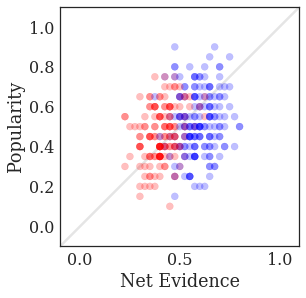

In [667]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})    
fig, ax = plt.subplots()

for i in range(n_iter):
    
    goods, final_pops, net_evidences, posts = particle.run_whole(n_parts, n_rounds, n_info, n_particles, mutation_rate, base_prob, act_prob)

    fit = stats.linregress(net_evidences, final_pops)
    slopes += [fit.slope]
    intercepts += [fit.intercept]
    errors += [fit.rvalue]
    #errors += [np.mean((np.array(net_evidences) * fit.slope + fit.intercept - final_pops)**2)]
    
    colors = np.array(['']*len(goods))
    colors[np.array(goods)] = 'blue'
    colors[~np.array(goods)] = 'red'

    plt.scatter(net_evidences,final_pops,s=50,alpha=0.25,c=colors)
    plt.xlabel('Net Evidence')
    plt.ylabel('Popularity')

#lims = [
#        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes                                                                               
#              np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes                                                                         
#              ]

lims = [-0.1,1.1]
ax.plot(lims, lims, 'k-', alpha=0.1, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)


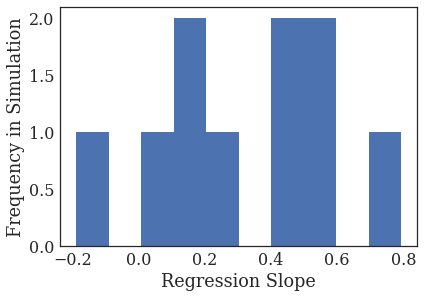

In [668]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})    
plt.hist(slopes)
plt.xlabel('Regression Slope')
plt.ylabel('Frequency in Simulation')
#plt.xlim((-2,2))

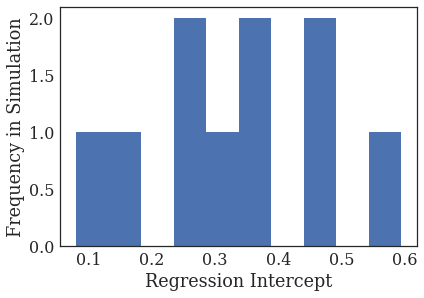

In [669]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})    
plt.hist(intercepts)
plt.xlabel('Regression Intercept')
plt.ylabel('Frequency in Simulation')
#plt.xlim((-1,1))

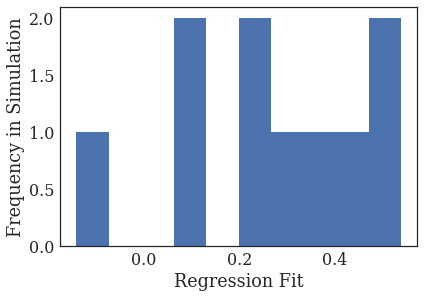

In [670]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})    
plt.hist(errors)
plt.xlabel('Regression Fit')
plt.ylabel('Frequency in Simulation')

In [671]:
errors

[-0.14205084090842315,
 0.29683609320394244,
 0.20234143932506909,
 0.52412191970320599,
 0.099290312412737849,
 0.53969537430518477,
 0.37438081484398811,
 0.076002833738727321,
 0.26457054329478247,
 0.46963415341706999]